Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.svm import SVR
import pickle
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor

Importing Dataset

In [2]:
df = pd.read_csv("coin_Litecoin.csv")
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Litecoin,LTC,2013-04-29 23:59:59,4.57360,4.22564,4.36676,4.38390,0.0,7.538896e+07
1,2,Litecoin,LTC,2013-04-30 23:59:59,4.57238,4.16896,4.40352,4.29649,0.0,7.402092e+07
2,3,Litecoin,LTC,2013-05-01 23:59:59,4.35686,3.52029,4.28954,3.80101,0.0,6.560460e+07
3,4,Litecoin,LTC,2013-05-02 23:59:59,4.03930,3.00717,3.78002,3.37198,0.0,5.828798e+07
4,5,Litecoin,LTC,2013-05-03 23:59:59,3.45361,2.39594,3.39044,3.04491,0.0,5.269485e+07


In [3]:
df.shape

(2991, 10)

From this, we got to know that there are 2991 rows of data available and for each row, we have 10 different features or columns.

In [4]:
df.dtypes

SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

From this, we got to know the datatype of each column

In [5]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,51.344396,46.931226,49.247365,49.279008,1.284851e+09,2.934139e+09
std,863.571653,66.572301,59.474423,63.256275,63.240464,2.247871e+09,3.964279e+09
min,1.000000,1.344810,1.113740,1.153240,1.157010,0.000000e+00,3.789242e+07
25%,748.500000,3.841130,3.730025,3.792325,3.794135,2.242845e+06,1.614311e+08
50%,1496.000000,31.386569,27.855200,29.737400,29.900200,1.158300e+08,1.477191e+09
75%,2243.500000,64.241222,60.338469,61.976711,62.025043,2.108696e+09,3.854304e+09
max,2991.000000,412.960141,345.298839,387.869178,386.450779,1.799426e+10,2.579652e+10


The above output generates statistical information for each numeric column:

count: number of non-missing values,
mean: arithmetic mean (average),
std: standard deviation,
min: minimum value,
25%: first quartile (25th perce,ntile),
50%: median (50th percentile),
75%: third quartile (75th perce,ntile),
max: maximum value

DATA PRE-PROCESSING

In [6]:
df.isnull().any()

SNo          False
Name         False
Symbol       False
Date         False
High         False
Low          False
Open         False
Close        False
Volume       False
Marketcap    False
dtype: bool

As from above output it is shown that the data has zero null values. 

In [3]:
df.drop(["SNo", "Name", "Symbol"],axis = 1, inplace= True)
df.head()

,Date,High,Low,Open,Close,Volume,Marketcap
0,2013-04-29 23:59:59,4.57360,4.22564,4.36676,4.38390,0.0,7.538896e+07
1,2013-04-30 23:59:59,4.57238,4.16896,4.40352,4.29649,0.0,7.402092e+07
2,2013-05-01 23:59:59,4.35686,3.52029,4.28954,3.80101,0.0,6.560460e+07
3,2013-05-02 23:59:59,4.03930,3.00717,3.78002,3.37198,0.0,5.828798e+07
4,2013-05-03 23:59:59,3.45361,2.39594,3.39044,3.04491,0.0,5.269485e+07


In the above step we dropped unnecessary columns.

FEATURE ENGINEERING AND DATA VISUALIZATION

In [4]:
df[["Date"]]= df.Date.apply(lambda x: pd.Series(str(x).split(" ")[:1]))
df.head()

,Date,High,Low,Open,Close,Volume,Marketcap
0,2013-04-29,4.57360,4.22564,4.36676,4.38390,0.0,7.538896e+07
1,2013-04-30,4.57238,4.16896,4.40352,4.29649,0.0,7.402092e+07
2,2013-05-01,4.35686,3.52029,4.28954,3.80101,0.0,6.560460e+07
3,2013-05-02,4.03930,3.00717,3.78002,3.37198,0.0,5.828798e+07
4,2013-05-03,3.45361,2.39594,3.39044,3.04491,0.0,5.269485e+07


In the above step we updated the date column in YY-MM-DD format.

In [5]:
df[["Year","Month"]]= df.Date.apply(lambda x: pd.Series(str(x).split("-")[:2]))
df.head()

,Date,High,Low,Open,Close,Volume,Marketcap,Year,Month
0,2013-04-29,4.57360,4.22564,4.36676,4.38390,0.0,7.538896e+07,2013,04
1,2013-04-30,4.57238,4.16896,4.40352,4.29649,0.0,7.402092e+07,2013,04
2,2013-05-01,4.35686,3.52029,4.28954,3.80101,0.0,6.560460e+07,2013,05
3,2013-05-02,4.03930,3.00717,3.78002,3.37198,0.0,5.828798e+07,2013,05
4,2013-05-03,3.45361,2.39594,3.39044,3.04491,0.0,5.269485e+07,2013,05


In the above step we extract two features Year and Month from Date column

In [6]:
df.Year = df.Year.astype(int)
df.Month = df.Month.astype(int)

In the above step we changed the data type of Year and Month column from string to int

In [12]:
df.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
Year           int32
Month          int32
dtype: object

It is clearly shown that the data types are changed

Now, firstly we will analyze the closing price as we need it to perform the prediction.

Text(0.5, 1.0, 'Date vs Close')

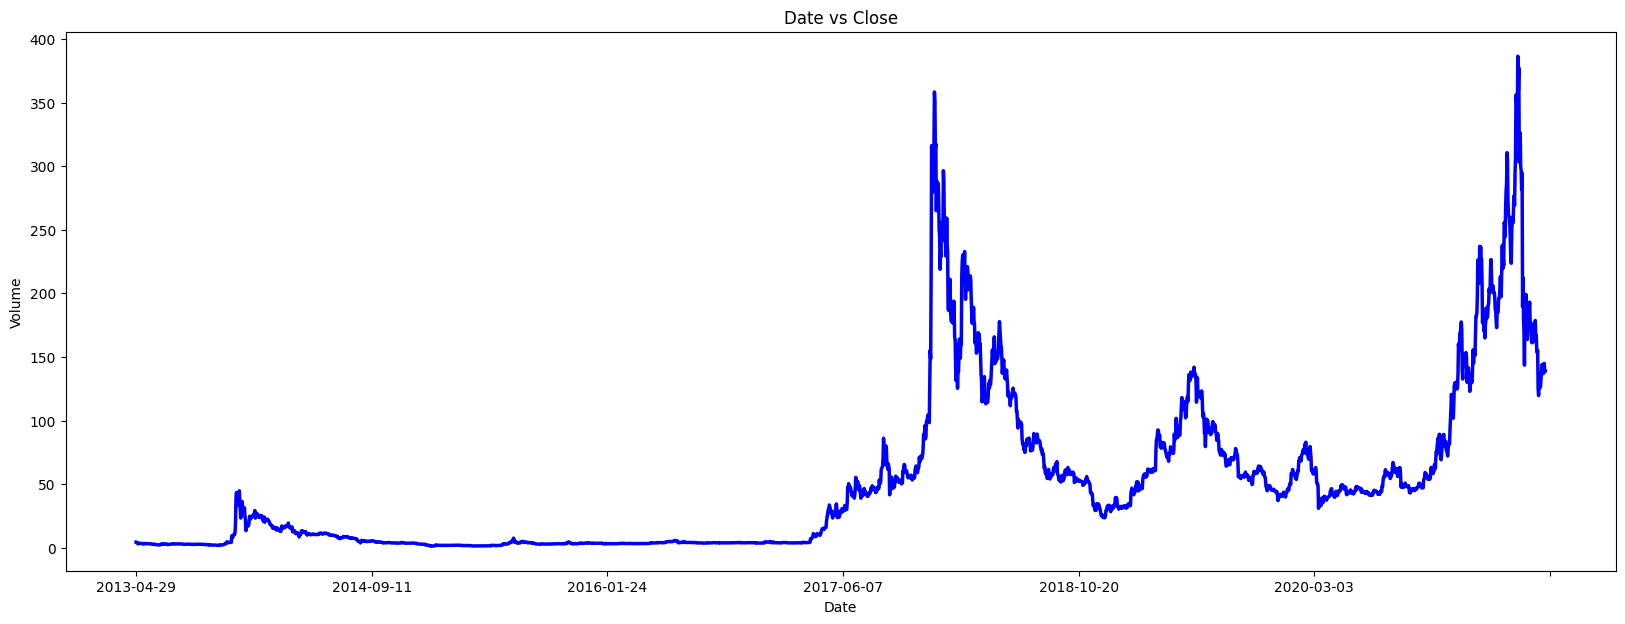

In [13]:
plt.figure(figsize=(20, 7))
x = df.groupby('Date')['Close'].mean()
x.plot(linewidth=2.5, color='b')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Close")

This plot visualize the daily average closing prices of Litecoin Coin.
The prices of the Litecoin stocks are showing an upward trend as depicted by the plot of the closing price of the Litecoin

In [12]:
Year_Unique = list(df.Year.unique())
Year_Unique

[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

We have created a list of unique categories in the Year column and then converted the list into numpy array. 

In [13]:
lst = list(df.Year.unique())
Unique_Year = np.array(lst)
Unique_Year

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [14]:
Unique_Year = Unique_Year.reshape(3,3)
Unique_Year

array([[2013, 2014, 2015],
       [2016, 2017, 2018],
       [2019, 2020, 2021]])

In the above code we reshape the array so that we can easily plot the lineplots for visualization.

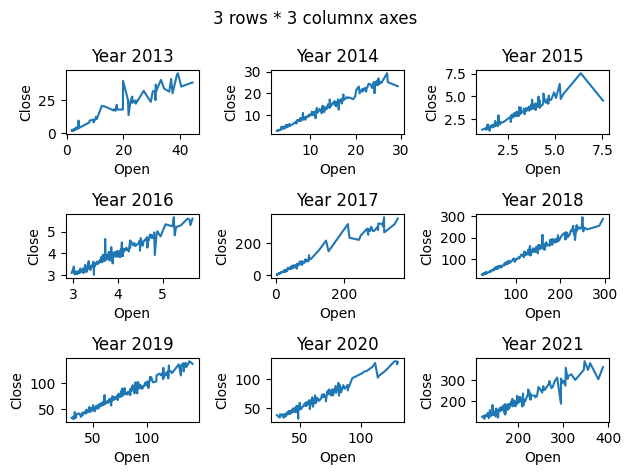

In [15]:
fig, axes = plt.subplots(3,3)
fig.suptitle("3 rows * 3 columnx axes")

for row in range(0,3):
    for col in range(0, 3):
        # print(Unique_Year[row, col])
        # plt.subplots_adjust(left = 0.1, bottom= 0.1, right= 0.9, top= 1, wspace=0.4, hspace=0.4)
        # fig.ax = plt.subplots(2,2, constrained_layout = True)
        fig.tight_layout()
        sns.lineplot(data = df[df.Year == Unique_Year[row, col]], x = "Open", y = "Close", ax = axes[row, col])
        axes[row, col].set_title(f'Year {Unique_Year[row, col]}')
        # plt.rcParams["Figure.figsize"] = [7.50,3.50]


The above line plots are showing the relationship between the opening and closing prices of Litecoin. A linear trend between the opening and closing prices of Litecoin (LTC) on a line plot indicates that there is a systematic relationship between these two variables.
The line slopes upwards from left to right, it suggests that as the opening price increases, the closing price tends to increase as well. 

In [8]:
features = ["Open", "High", "Low","Volume"]

C:\Users\Preeti\AppData\Local\Temp\ipykernel_12532\2880881391.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


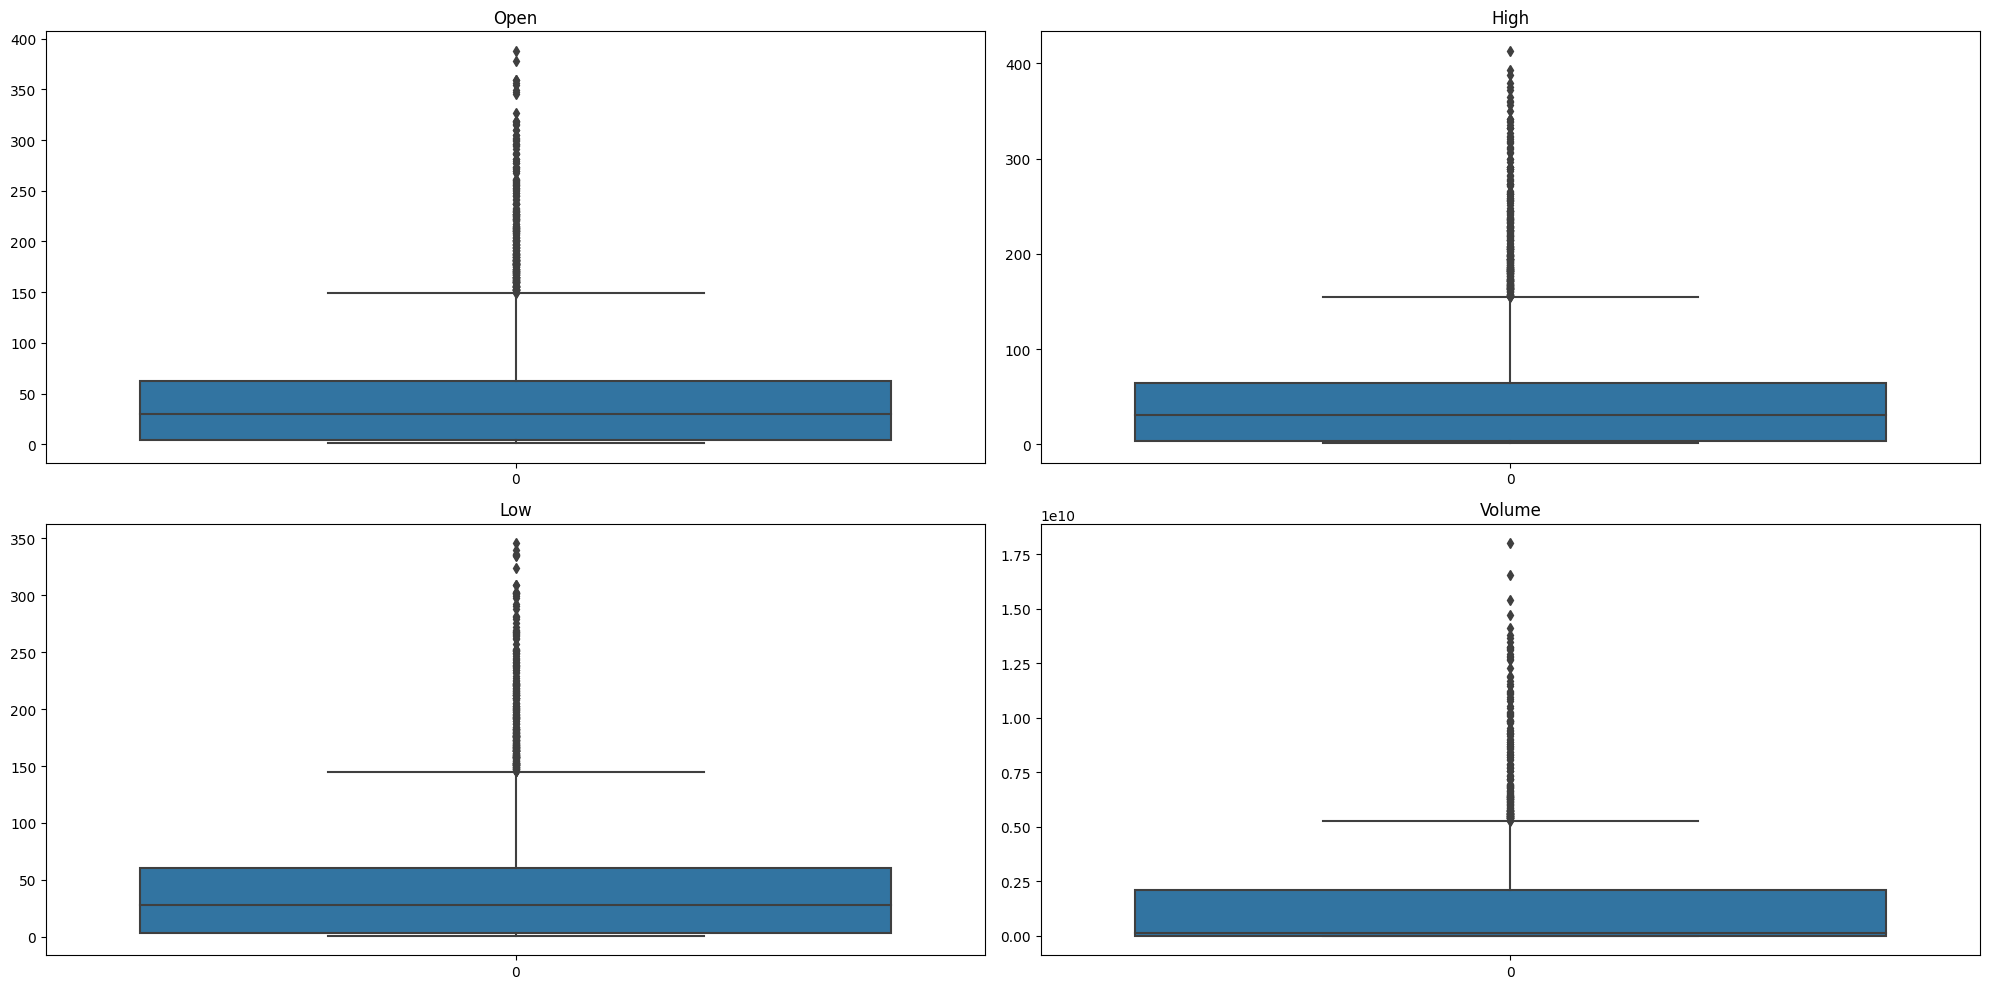

In [9]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sns.boxplot(df[col])
  plt.title(col)
plt.tight_layout()
plt.show()

The above boxplots help us to visualize the distribution of four features ("Open", "High", "Low" and "Volume").
There are so many outliers in the data which means that the prices of the Lite Coin have varied hugely in a very short period of time. Let’s check this with the help of a barplot. 

C:\Users\Preeti\AppData\Local\Temp\ipykernel_332\2566259809.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped = df.groupby('Year').mean()
C:\Users\Preeti\AppData\Local\Temp\ipykernel_332\2566259809.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


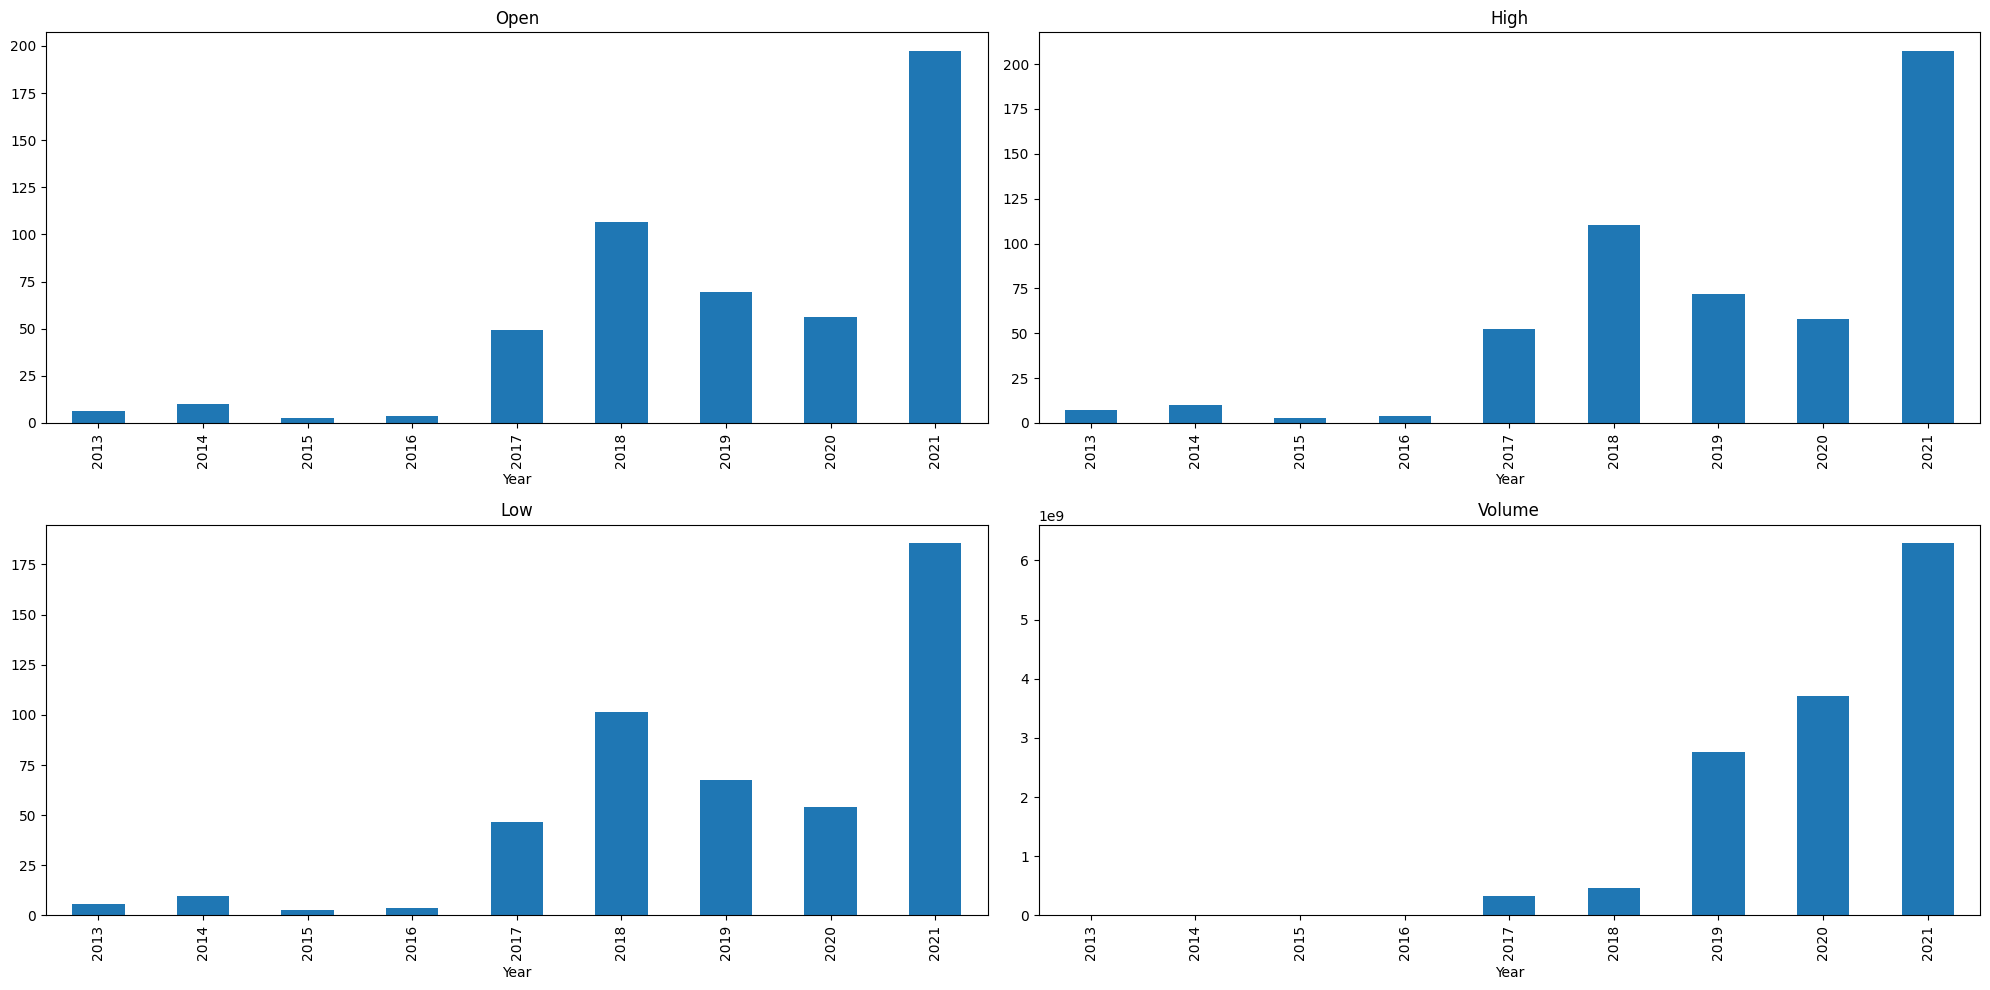

In [7]:
data_grouped = df.groupby('Year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Volume']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
  plt.title(col)
plt.tight_layout()
plt.show()

Here we can observe why there are so many outliers in the data as the prices of litecoin have exploded in the year 2021. Also the prices of the litecoin shows upwardtrend from year 2017

Splitting the data into train and test data.

In [7]:
x = df[["High","Low","Open", "Volume"]]
y = df["Close"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = 42)

x_train consists the features which we are going to use to train the model

In [15]:
x_train.head()

,High,Low,Open,Volume
1393,3.784440,3.749620,3.768650,3.128060e+06
2120,44.649575,42.911342,43.396259,1.089206e+09
1518,46.215302,43.054298,44.490700,3.543720e+08
1272,3.913640,3.799350,3.809690,3.858130e+06
25,3.185500,3.036580,3.170130,0.000000e+00


x_test consists the features which we are going to used for test the model

In [16]:
x_test.head()

,High,Low,Open,Volume
1410,3.844470,3.762810,3.766390,3.092100e+06
1915,85.218300,82.043999,83.730003,3.587980e+08
785,3.027770,2.970630,3.027770,2.332310e+06
2587,45.377191,44.324527,44.776534,2.632198e+09
324,20.983601,17.225201,19.453400,3.504500e+07


y_train consists the target which we are going to use to train the model

In [17]:
y_train.head()

1393     3.767660
2120    43.928369
1518    43.924400
1272     3.885460
25       3.179480
Name: Close, dtype: float64

y_test consists the target which we are going to use to test the model

In [18]:
y_test.head()

1410     3.838420
1915    84.463600
785      2.974530
2587    44.652465
324     17.236900
Name: Close, dtype: float64

MODEL SELECTION

Decision Tree

In [8]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)

y_pred_dt = regressor.predict(x_test)
y_pred_dt

array([  3.8236599 ,  84.40614405,   3.02846003,  44.85007694,
        17.56550026,   3.8803401 ,  45.0945597 , 161.16107039,
        24.86401802,  41.97580954,   3.02619004, 149.93142516,
         3.95344996,  98.29239655, 221.06904212,   2.35277009,
         3.18608999, 148.48800659,   3.81191993,   1.72744   ,
         3.0385201 ,  36.43709163,   3.90769005,  58.7133    ,
        24.37759972,  72.96495341, 157.05499268,   3.8854599 ,
         3.47904992,  75.98436729,   2.35277009,   3.8822701 ,
        64.2696991 ,  55.17369843,  43.56013067,   5.28725004,
         5.59326982,  88.6778606 ,  98.29239655,   2.7277801 ,
       353.51035114,  67.28563094,   3.47904992,   2.11818004,
        52.13850021,   3.30351996,  56.64311208,  79.67799061,
        29.68160057,  49.08975339,  69.12387404,   3.08675003,
         3.36502004,   2.79471993,  43.92836922,  11.64309978,
        15.89500046,  76.46756358,   2.31016994,   4.06311989,
         8.56692028, 176.51100159,   7.9762001 ,   4.39

In [9]:
regressor.score(x_test, y_test, sample_weight=None)

0.9973495204727458

Random Forest

In [10]:
rf = RandomForestRegressor(n_estimators=50)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
y_pred_rf

array([  3.80647304,  83.24370586,   2.99899121,  45.11308568,
        19.10612785,   3.88059782,  44.92624095, 159.43689753,
        25.54760092,  42.41490745,   3.07640284, 151.32308294,
         3.94601099,  98.11569305, 217.28202435,   2.39776966,
         3.146678  , 146.72488448,   3.8127702 ,   1.7471796 ,
         3.03572719,  35.05501859,   3.90387063,  58.29461053,
        24.25686439,  73.17378054, 156.79987347,   3.866484  ,
         3.39720741,  75.56704169,   2.35822262,   3.88036282,
        63.9965751 ,  55.07671196,  43.15478606,   5.15650043,
         5.60080455,  88.55151367,  98.29257483,   2.72661598,
       350.35533448,  67.92077851,   3.46539802,   2.10351083,
        51.34785057,   3.30562399,  56.94344268,  83.62843846,
        30.4676344 ,  48.14138329,  70.4192056 ,   3.11604701,
         3.39755379,   2.88063899,  43.52481695,  11.55490391,
        15.77289619,  74.84014   ,   2.3187494 ,   4.03697019,
         8.59465387, 179.43282439,   7.34052999,   4.43

In [11]:
print(r2_score(y_test,y_pred_rf))
print(mean_absolute_error(y_test,y_pred_rf))
print(mean_squared_error(y_test,y_pred_rf))

0.9975619741211849
1.1833194464348569
9.556121728349064


MODEL TRAINING

Linear Regression

In [20]:
model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(y_pred)
with open('Litecoin.pkl','wb') as file:
    pickle.dump(model,file)

[  3.86612419  83.37976879   3.03672051  44.92250104  19.20151937
   3.92708289  44.4491836  157.05993342  26.83125673  42.13467105
   3.13562824 148.83032168   3.98923956  94.34490115 216.83333576
   2.42881574   3.20417605 142.48389422   3.84774529   1.79454732
   3.1066005   34.52179239   3.96970818  58.0087984   24.3534651
  72.29775367 156.80796312   3.92087367   3.492151    74.98095292
   2.40997699   3.93051646  65.78540566  54.37985068  43.37896128
   5.32786726   5.63853085  87.38248196  97.05161685   2.7645949
 370.67163173  67.64520455   3.50317621   2.30691624  51.13607502
   3.36893806  57.25030751  84.95868772  31.09615091  47.95961712
  73.10974373   3.16767791   3.47102954   2.91886077  43.60642291
  11.61461326  15.81115518  75.62011499   2.34804246   4.09912159
   8.53062057 180.21864267   8.49069786   4.54386702  57.99595518
  89.14787971  45.30237206   3.58531511   2.75514591   1.81909447
  58.31431112  41.68534541   1.53046382   1.80254198  58.22629278
  31.7051185

MODEL EVALUATION

In [21]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.999010583218634
0.8139905659868935


In [22]:
regressor = SVR(kernel="Linear")
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
y_pred

InvalidParameterError: The 'kernel' parameter of SVR must be a str among {'poly', 'linear', 'precomputed', 'rbf', 'sigmoid'} or a callable. Got 'Linear' instead.